<a href="https://colab.research.google.com/github/Ahmadbahar911/belajar-ML/blob/main/Copy_of_%5BClustering%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


**<H1>About Dataset**\
**<h2>Context:**
<h3>This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

**<h2>Inspiration:**
<h3>The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

**<h2>Dataset Information:**\
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

- **Name**: This column represents the name of the patient associated with the healthcare record.
- **Age**: The age of the patient at the time of admission, expressed in years.
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."
- **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
- **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
- **Room Number**: The room number where the patient was accommodated during their admission.
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [38]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [84]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/archive/healthcare_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [85]:
# Shape of the data
print(f"Dataset shape: {data.shape}")

Dataset shape: (55500, 15)


In [86]:
# Summary statistics of numerical columns
print(data.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [87]:
data.describe(include= "object").T

,count,unique,top,freq
Name,55500,49992,DAvId muNoZ,3
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Date of Admission,55500,1827,2024-03-16,50
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Discharge Date,55500,1856,2020-03-15,53


In [88]:
# Checking for missing values
print(data.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [89]:
# Check data types
print(data.dtypes)

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [92]:
# Exploring unique values in categorical columns
categorical_cols = ['Gender', 'Blood Type', 'Admission Type', 'Insurance Provider', 'Test Results', 'Medication']
for col in categorical_cols:
    print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in Admission Type: ['Urgent' 'Emergency' 'Elective']
Unique values in Insurance Provider: ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Unique values in Test Results: ['Normal' 'Inconclusive' 'Abnormal']
Unique values in Medication: ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']


In [39]:
# Plot histogram for the 'Age' column
fig = px.histogram(data,
                   x='Age',
                   title='Age Distribution',
                   nbins=30)
fig.show()

In [42]:
# Define object-type columns
objek_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', "Medication", 'Test Results']

# Define a new custom color palette (non-pastel colors)
custom_palette = [
    "#1F77B4",  # blue
    "#FF7F0E",  # orange
    "#2CA02C",  # green
    "#D62728",  # red
    "#9467BD",  # purple
    "#8C564B",  # brown
    "#E377C2",  # pink
    "#7F7F7F",  # gray
    "#BCBD22",  # yellow-green
    "#17BECF",  # cyan
]

# Set this custom palette for use
px.colors.qualitative.Pastel = custom_palette
palette = px.colors.qualitative.Pastel

# Plotly plots for object-type columns
for col in objek_columns:
    fig = go.Figure()
    for i, (category, count) in enumerate(data[col].value_counts().items()):
        fig.add_trace(go.Bar(x=[col], y=[count], name=category, marker_color=palette[i]))
    fig.update_layout(title=f'Distribution of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()

In [43]:
# Group 'Age' by 'Medical Condition' and calculate the mean age for each condition
age_by_condition = data.groupby('Medical Condition')['Age'].mean().reset_index()

# Plot using Plotly Express with different color palettes
fig = px.bar(age_by_condition, x='Medical Condition', y='Age', color='Medical Condition',
             title='Average Age by Medical Condition',
             labels={'Age': 'Average Age', 'Medical Condition': 'Medical Condition'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

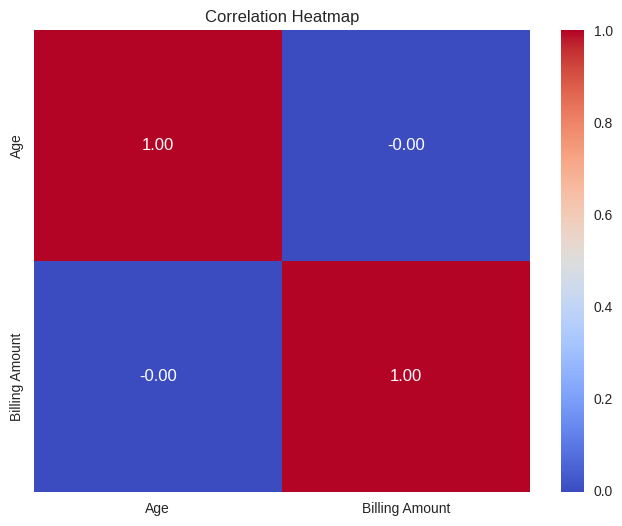

In [46]:
numeric_features = ['Age', 'Billing Amount']
#features = ['Age', 'Billing Amount', 'Gender', 'Blood Type', 'Admission Type']
# Calculate the correlation matrix for numerical features
correlation_matrix = data[numeric_features].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Pada Tahap corelation heatmap baru bisa menampilkan hubungan antara numeric_features yaitu Age dan Billing Amount, sedangkan categorical_features = ['Gender', 'Blood Type', 'Admission Type'] akan dilakukan label encoding dan akan dilakukan corelation heatmap pada tahap Data Preprocessing

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [82]:

# Selecting relevant features
numeric_features = ['Age', 'Billing Amount']
categorical_features = ['Gender', 'Blood Type', 'Admission Type', 'Medical Condition', 'Insurance Provider', 'Test Results']

# Keeping only selected columns
data_clustering = data[numeric_features + categorical_features]


In [57]:
# Handling missing values
data_clustering = data_clustering.dropna()


In [91]:
#categorical_features = ['Gender', 'Blood Type', 'Admission Type']
for col in categorical_features:
    data_clustering[col] = LabelEncoder().fit_transform(data_clustering[col])

data_clustering.head()

,Age,Billing Amount,Gender,Blood Type,Admission Type,Medical Condition,Insurance Provider,Test Results
0,30,18856.281306,1,5,2,2,1,2
1,62,33643.327287,1,0,1,5,3,1
2,76,27955.096079,0,1,1,5,0,2
3,28,37909.782410,0,6,0,3,3,0
4,43,14238.317814,0,2,2,2,0,0


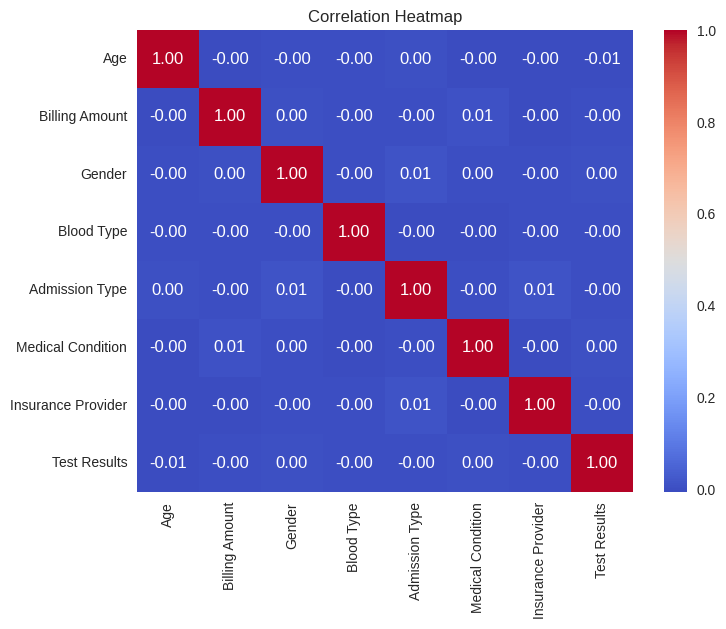

In [59]:
#features = ['Age', 'Billing Amount', 'Gender', 'Blood Type', 'Admission Type']
# Calculate the correlation matrix for numerical features
correlation_matrix = data_clustering.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

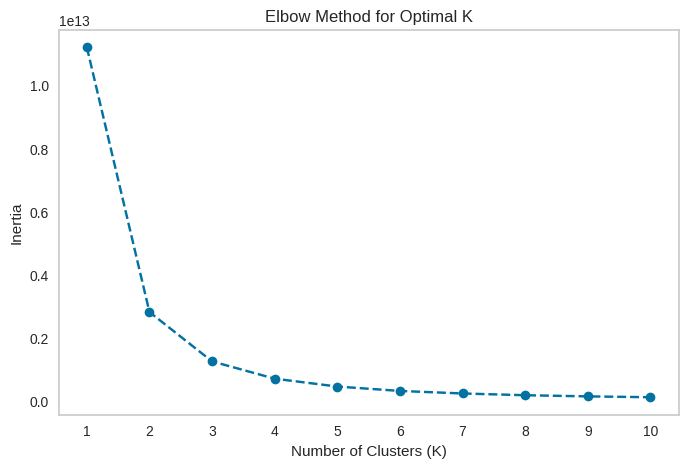

In [60]:

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()


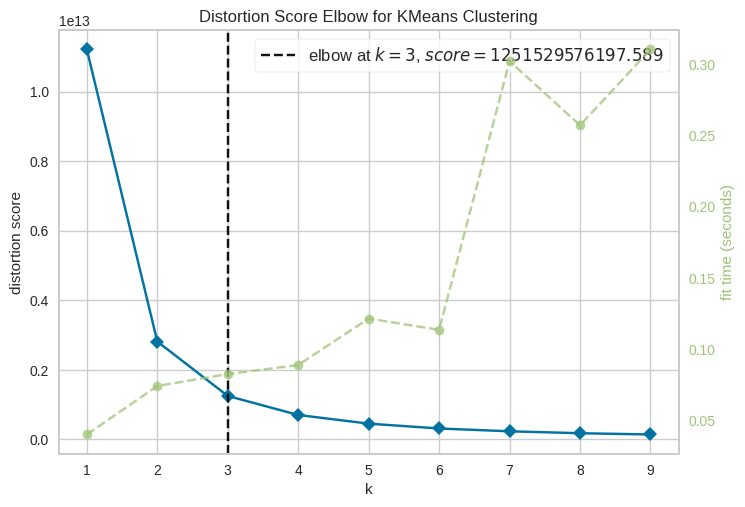

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_clustering)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [64]:
# Choosing an optimal number of clusters (e.g., 4 from the elbow point)
optimal_k = 3

# Applying K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_clustering)

# Adding cluster labels to the original dataset
data_clustering['Cluster'] = clusters

# Displaying the first few rows with cluster labels
data_clustering.head()


,Age,Billing Amount,Gender,Blood Type,Admission Type,Medical Condition,Insurance Provider,Test Results,Cluster
0,30,18856.281306,1,5,2,2,1,2,2
1,62,33643.327287,1,0,1,5,3,1,2
2,76,27955.096079,0,1,1,5,0,2,2
3,28,37909.782410,0,6,0,3,3,0,1
4,43,14238.317814,0,2,2,2,0,0,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [65]:


# Calculate the silhouette score for the clustering result
silhouette_avg = silhouette_score(data_clustering, clusters)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5899275033862932


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [67]:
features = ['Age', 'Billing Amount', 'Gender', 'Blood Type', 'Admission Type']

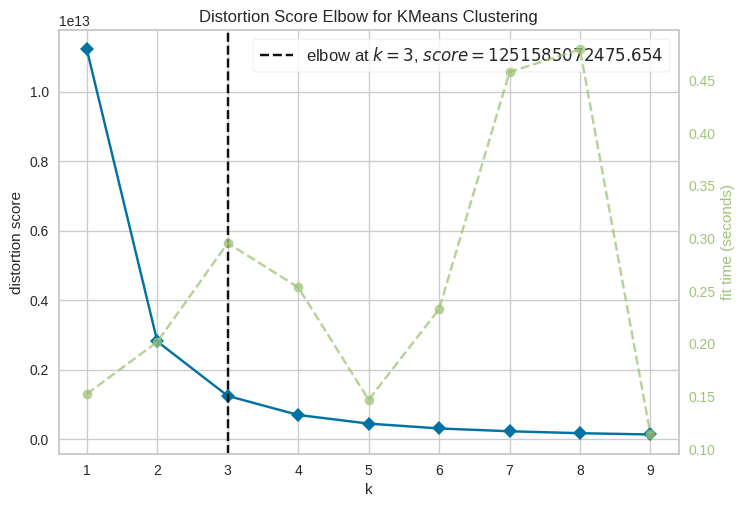

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(data_clustering[features])

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [69]:
# Choosing an optimal number of clusters (e.g., 4 from the elbow point)
optimal_k = 3

# Applying K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_feature_selection = kmeans.fit_predict(data_clustering)

# Adding cluster labels to the original dataset
data_clustering['Cluster fs'] = clusters_feature_selection

# Displaying the first few rows with cluster labels
data_clustering.head()


,Age,Billing Amount,Gender,Blood Type,Admission Type,Medical Condition,Insurance Provider,Test Results,Cluster,Cluster fs
0,30,18856.281306,1,5,2,2,1,2,2,2
1,62,33643.327287,1,0,1,5,3,1,2,2
2,76,27955.096079,0,1,1,5,0,2,2,2
3,28,37909.782410,0,6,0,3,3,0,1,1
4,43,14238.317814,0,2,2,2,0,0,0,0


In [71]:


# Calculate the silhouette score for the clustering result
silhouette_avg = silhouette_score(data_clustering[features], clusters_feature_selection)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5899277890055539


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

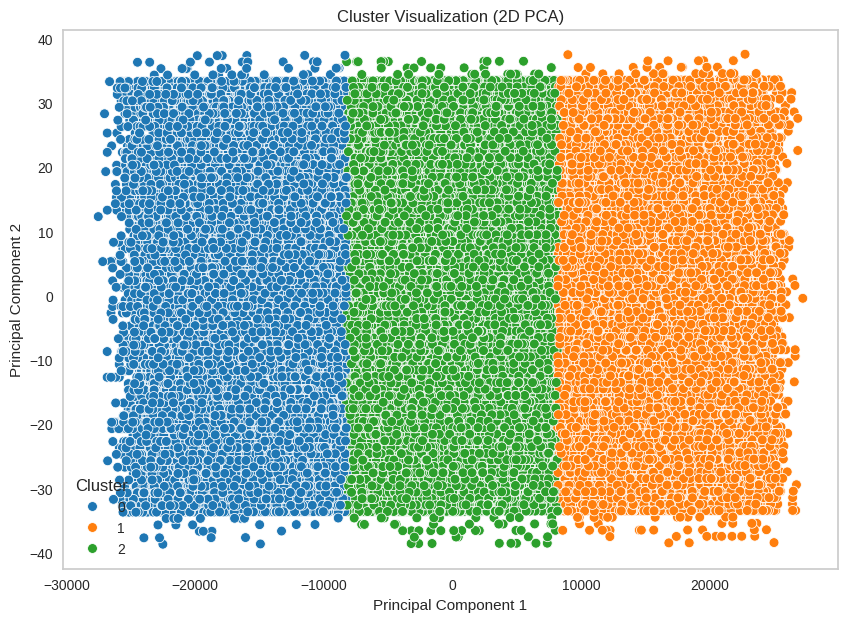

In [72]:


# Reducing dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_clustering)

# Creating a DataFrame with reduced dimensions and clusters
plot_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=plot_data, palette='tab10', s=50
)
plt.title('Cluster Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [80]:

# Rata-rata fitur per cluster
cluster_summary = data_clustering.groupby("Cluster").mean()
cluster_summary

,Age,Billing Amount,Gender,Blood Type,Admission Type,Medical Condition,Insurance Provider,Test Results,Cluster fs
Cluster,,,,,,,,,
0,51.611120,9098.627629,0.501654,3.502360,1.003472,2.477678,2.018497,1.003526,0.0
1,51.497543,41929.657774,0.504995,3.493222,0.997840,2.503321,2.013231,0.997084,1.0
2,51.510082,25516.895086,0.494662,3.482262,0.994447,2.515419,1.996388,0.993476,2.0


Berikut analisis karakteristik tiap cluster berdasarkan data yang tersedia setelah label encoding:

---

### **Cluster 0**
#### **Karakteristik:**
1. **Usia Rata-rata**: 51.61 tahun  
   - Mendekati usia paruh baya.
2. **Billing Amount**: 9,098.63  
   - Biaya perawatan rendah, menunjukkan kondisi pasien yang mungkin ringan.
3. **Gender**: 0.50  
   - Distribusi gender hampir sama (pria dan wanita seimbang).
4. **Blood Type**: 3.50  
   - Golongan darah mayoritas mendekati 'O+'.
5. **Admission Type**: 1.00  
   - Mayoritas pasien masuk melalui tipe admission **Emergency**.
6. **Medical Condition**: 2.48  
   - Mendekati kategori kondisi medis menengah.
7. **Insurance Provider**: 2.01  
   - Dominasi oleh penyedia asuransi seperti **Aetna**.
8. **Test Results**: 1.00  
   - Hasil tes pasien mendekati **Inconclusive**.

#### **Interpretasi:**
- **Kesimpulan**: Cluster ini kemungkinan berisi pasien dengan kondisi medis ringan hingga sedang, membutuhkan biaya perawatan yang rendah. Mayoritas pasien masuk melalui emergency, tetapi hasil tes tidak selalu menunjukkan kondisi serius.
- **Potensi Pola yang Dimanfaatkan**:
   - Fokus pada tindakan pencegahan atau perawatan standar yang hemat biaya.
   - Asuransi dominan bisa menjadi target kolaborasi untuk paket preventif.

---

### **Cluster 1**
#### **Karakteristik:**
1. **Usia Rata-rata**: 51.50 tahun  
   - Sama seperti cluster lainnya, usia paruh baya.
2. **Billing Amount**: 41,929.66  
   - Biaya perawatan tertinggi, menandakan kondisi pasien yang kompleks.
3. **Gender**: 0.50  
   - Gender seimbang.
4. **Blood Type**: 3.49  
   - Golongan darah mayoritas mendekati 'O+'.
5. **Admission Type**: 0.99  
   - Hampir semua pasien masuk melalui **Emergency**.
6. **Medical Condition**: 2.50  
   - Mendekati kondisi medis yang lebih kompleks.
7. **Insurance Provider**: 2.01  
   - Didominasi oleh **Aetna**.
8. **Test Results**: 0.99  
   - Hasil tes pasien mendekati **Abnormal**.

#### **Interpretasi:**
- **Kesimpulan**: Cluster ini berisi pasien dengan kondisi medis yang berat dan membutuhkan intervensi mendesak. Hal ini tercermin dari biaya perawatan yang tinggi dan hasil tes yang menunjukkan kelainan.
- **Potensi Pola yang Dimanfaatkan**:
   - Sumber daya medis perlu dialokasikan lebih banyak untuk kelompok ini.
   - Penyedia asuransi dapat menjadi mitra untuk program manajemen risiko biaya tinggi.

---

### **Cluster 2**
#### **Karakteristik:**
1. **Usia Rata-rata**: 51.51 tahun  
   - Usia tidak berbeda jauh dari cluster lain.
2. **Billing Amount**: 25,516.90  
   - Biaya perawatan di tengah-tengah, menunjukkan kondisi medis sedang.
3. **Gender**: 0.49  
   - Gender masih seimbang.
4. **Blood Type**: 3.48  
   - Golongan darah mayoritas mendekati 'O+'.
5. **Admission Type**: 0.99  
   - Hampir semua pasien masuk melalui **Emergency**.
6. **Medical Condition**: 2.51  
   - Mendekati kondisi medis menengah hingga berat.
7. **Insurance Provider**: 1.99  
   - Didominasi oleh penyedia asuransi seperti **Aetna** atau yang hampir sama.
8. **Test Results**: 0.99  
   - Hasil tes mendekati **Abnormal**.

#### **Interpretasi:**
- **Kesimpulan**: Cluster ini mewakili pasien dengan kondisi medis yang sedang hingga berat. Biaya perawatan lebih rendah dari Cluster 1, tetapi masih cukup signifikan.
- **Potensi Pola yang Dimanfaatkan**:
   - Pasien dalam cluster ini bisa menjadi target untuk program manajemen kesehatan untuk mencegah kondisi memburuk.
   - Fokus pada asuransi tertentu untuk mengoptimalkan perawatan.

---

### **Evaluasi Hasil Clustering**
1. **Kesesuaian dengan Ekspektasi**:  
   - **Biaya**: Cluster 0 memiliki biaya rendah, sedangkan Cluster 1 memiliki biaya tertinggi, yang sesuai dengan logika medis. Cluster 2 berada di antara keduanya. Hal ini menunjukkan bahwa hasil clustering relevan dengan kebutuhan bisnis, yaitu membedakan pasien berdasarkan tingkat kompleksitas.
   - **Admission Type**: Mayoritas pasien dalam Cluster 1 dan Cluster 2 masuk melalui admission **Emergency**, yang sesuai untuk pasien dengan kondisi serius.
   - **Test Results**: Distribusi hasil tes mendukung logika medis, di mana hasil **Abnormal** lebih sering muncul pada cluster dengan biaya tinggi.

2. **Pola yang Bisa Dimanfaatkan**:
   - **Cluster 0**: Fokus pada upaya preventif dan pengurangan readmission.
   - **Cluster 1**: Meningkatkan efisiensi layanan darurat dan mengelola biaya tinggi melalui negosiasi dengan penyedia asuransi.
   - **Cluster 2**: Meningkatkan monitoring pasien untuk mencegah transisi ke kondisi yang lebih parah.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.